# Project 3: Fraud Detection

In this third project, the main objective is to develop a fraud detection model capable of predicting fraudulent bank transactions. The implementation places particular emphasis on the following key areas:
- Unsupervised learning
- Semi-supervised learning
- Dealing with class imbalance
- Using advanced performance metrics to evaluate detection models under different inspection effort thresholds.

## Problem Understanding

The subject of fraud has always been a problem for the financial sector and with the ongoing technological advance, the problem will only increase. According to the [ Alloy’s 2024 State of Fraud Benchmark Report](https://www.alloy.com/state-of-fraud-benchmark-report-2024), which has asked more than 400 descision-makers in fraud-related roles, 57% of banks, fintechs, and credit unions lost over $500K in direct fraud losses in 2023. These figures reflect only the direct losses from fraud. That is, the actual amounts successfully stolen through fraudulent activity. 

In the UK, 10% of companies have lost between €1 and €100,000; 26% between €100,001 and €500,000; 34% between €500,001 and €1,000,000; 24% between €1,000,001 and €10,000,000; and 1% have suffered losses exceeding €10,000,000 due to fraud. Only 7 % reported no fraud loss, or simply don't know if they have.

Around 60% of the respondents reported an increase in the number of fraud attempts in consumer accounts compared to the previous year. Meanwhile, just over half the respondends have reported an increase in fraud attempts in business accounts.

The [UK Finance Annual Fraud Report 2022](https://www.ukfinance.org.uk/system/files/2023-05/Annual%20Fraud%20Report%202023_0.pdf) reported a net total loss £1.2 bn across the collective banking and finance industry in 2022 alone. This shows the damaging effects of fraud and emphazises the importance of fraud detection to prevent the enormous amounts of anual loss.

While the field has developed rapidly in the last few years, especially through the rise of artificial intelligence, there are still some challenges for successful fraud detection models. According to this article by the [Computer Science & IT Research Journal](https://fepbl.com/index.php/csitrj/article/view/1252), one major issue is the quality of datasets, especially due to the imbalance between fraudulent and legitimate activities, which can lead to biased or inaccurate predictions. Additionally, datasets suffer limited diversity or hidden biases, which skew model performances and undermine fairness. 

Overall, the problem of fraud and the importance of dealing with it through fraud detection systems is clear. The following sections of this notebook will focus on explring the data, understanding how to deal with class imbalance, as well as building and evaluating a fraud detection system using advanced techniques using unsupervised and semi-supervised learning.

In [23]:
# Includes
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Understanding the data

The first thing to do is to take a closer look at the data that will be used to train the model later. Then, the data will be split into a test-train-val split before any further analysis.

In [10]:
# Load data
df = pd.read_csv("data/sales.csv")
df = df.set_index('Unnamed: 0') # set index
df.index.name = None
df

,ID,Prod,Quant,Val,Insp
1,v1,p1,182.0,1665.0,unkn
2,v2,p1,3072.0,8780.0,unkn
3,v3,p1,20393.0,76990.0,unkn
4,v4,p1,112.0,1100.0,unkn
5,v3,p1,6164.0,20260.0,unkn
...,...,...,...,...,...
411814,v5918,p4126,113.0,9330.0,unkn
411815,v2540,p4126,118.0,3355.0,unkn
411816,v5896,p4127,143.0,1835.0,unkn
411817,v1796,p4127,102.0,1445.0,unkn


In [17]:
df["Insp"].unique()

array(['unkn', 'ok', 'fraud'], dtype=object)

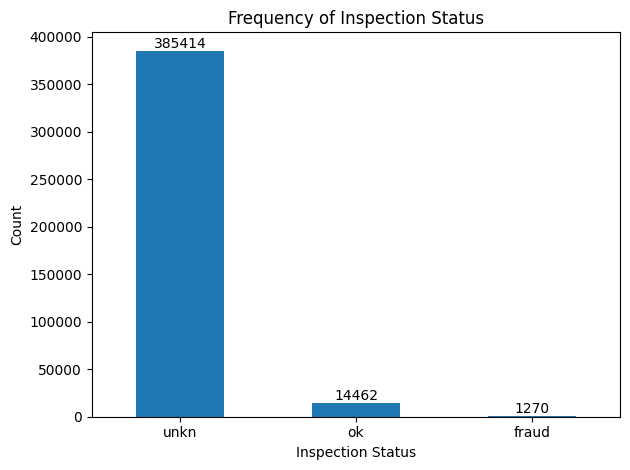

In [22]:
counts = df["Insp"].value_counts() # get value counts for each unique "Insp" value

ax = counts.plot(kind="bar") # create plot

plt.xlabel("Inspection Status")
plt.ylabel("Count")
plt.title("Frequency of Inspection Status")
plt.xticks(rotation=0)

# plot actual values
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The data is consists of a transaction Id("ID"), the products("Prod") bought with a quantity("Quant") and a the corresponding value("Val") spent during the transaction. A inspected value("Insp") flags the transaction as 'ok', 'fraud', or as 'unknown'. When looking at the value distribution, it can be seen that there is a significant amount of unknown data, and a small amount of data that is actually flagged as okay or fraudulent. This data imbalance needs to be addressed later.

For now, a portion of the labeled data will be used for the test data, while a combination of labeled and unlabeled data will be used for training.

In [ ]:
# Seperate labeled and unlabeled data
labeled_df = df[df["Insp"].isin(["ok", "fraud"])].copy()
unlabeled_df = df[df["Insp"] == "unkn"].copy()

# split into train and test set for labeled data
train_labeled, test_labeled = train_test_split(
    labeled_df,
    test_size=0.25, # 75% - 25% split
    random_state=123,
    stratify=labeled_df["Insp"]  # stratifying for maximum class balance
)